In [66]:
import numpy as np

## Exercise 1


In [67]:
# To compute the eigenvalues and eigenvectors of a matrix C:
C=np.array(((2,1.8),(1.8,2))) # Example of covariance matrix
np.linalg.eig(C)


(array([3.8, 0.2]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## Exercise 2
In the following code box you can find all the methods and attributes of the PCA class that you need to do this exercise. For more information about each of them, check the documentation of the class: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.


In [68]:
from sklearn.decomposition import PCA

#Data:
X = np.array([[0, 0], [1, 1], [2, 3], [3, 2], [4, 4]])


pca = PCA()
pca.fit(X)
print("a)", pca.components_,"\n")
print("b)", pca.explained_variance_,"\n")
print("c)", pca.transform(X),"\n")
print("d)", pca.transform([[2,3]]),"\n")

a) [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]] 

b) [4.75 0.25] 

c) [[ 2.82842712e+00 -4.44089210e-16]
 [ 1.41421356e+00 -2.22044605e-16]
 [-7.07106781e-01 -7.07106781e-01]
 [-7.07106781e-01  7.07106781e-01]
 [-2.82842712e+00  4.44089210e-16]] 

d) [[-0.70710678 -0.70710678]] 



## Exercise 3


In the lab where you work, you have received a new specimen of flower that has to be analyzed. Using your botanical knowledge you discover that it is an iris flower. The problem is that there are three spices of iris (Setosa, Versicolor and Virginica) that are very similar and you need to know which kind of iris is your specimen. For the aspect of the flower, it could be both an Iris Virginica or Iris Versicolor. Luckily, you have a dataset with a feature vector $x_i=$(sepal length, sepal width, petal length, petal width) for $i=1,2,3...150$ (since we have 150 samples), so you decide to use it to compare your new sample with the already classified samples to classify it.
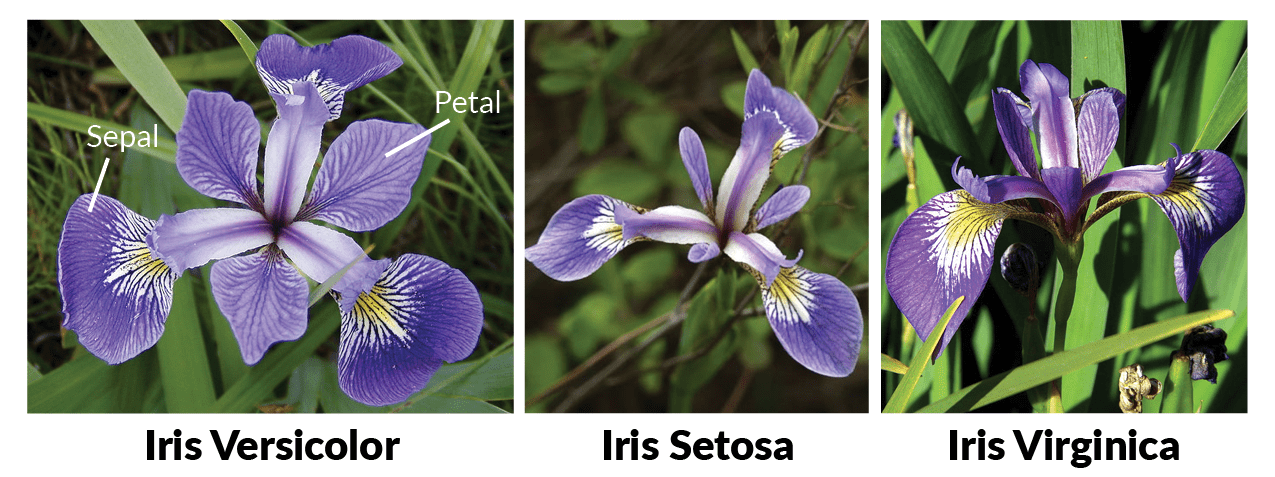

We start loading the database:

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

a) You measure the petal and sepal of your flower and write the feature vector is x=(6.5, 3.2, 4.3, 1.8). It is time to plot the features of your new specimen with the ones from the dataset. Since the dataset have 4 dimensions, you can not visualize all the features together. Instead, you plot all the possible combinations of two features below. Which kinds of iris are more similar in terms of petal lenght and width? Is the dataset linearly separable? To which kind of iris do you think that your new sample belongs to?

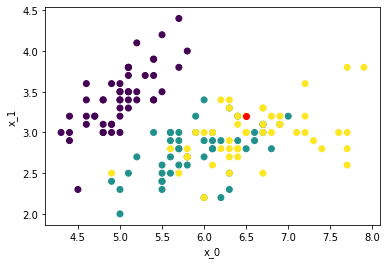

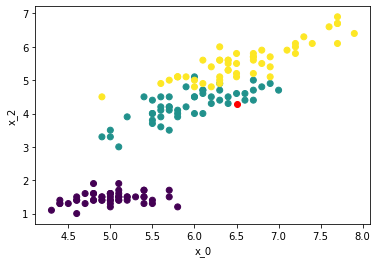

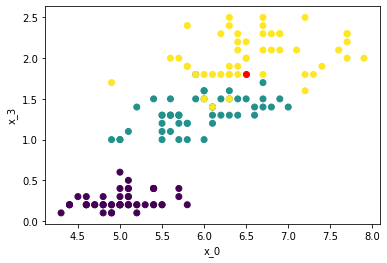

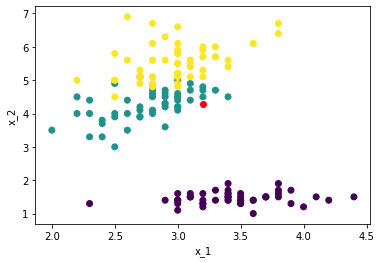

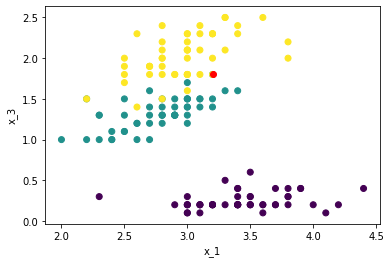

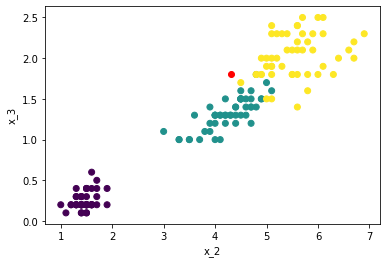

In [102]:
comb=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
x=[6.5, 3.2, 4.3, 1.8]
for com in comb:
    i,j=com[0],com[1]
    plt.scatter(X[:, i], X[:, j], c=y)
    plt.xlabel("x_"+str(i))
    plt.ylabel("x_"+str(j))
    
    plt.scatter(x[i],x[j] , c="r")

    plt.show()

b) You realize that a much better idea instead of using so many plots would be to use PCA to project the data in a lower dimensional space but conserving as much information as possible. 
Use PCA to reduce the dimensionality of the data to 2 dimensions and project the new sample to the 2D basis. Plot the projection of the dataset and the new sample together. Can you classify it more easily now?

The projected point is  [[0.90477983 0.39602274]] 



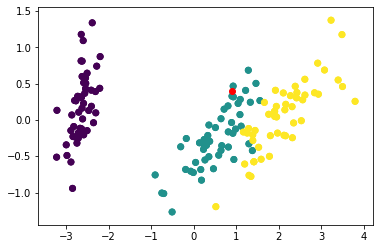

In [103]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_trans = pca.transform(X)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y)

#Your code here
xproj=pca.transform([x])

print("The projected point is ", xproj,"\n")
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y)
plt.scatter(xproj[0,0], xproj[0,1], c="r")
